In [1]:
import numpy as np
import pandas as pd
import re
import tqdm
import matplotlib.pyplot as plt

from math import isnan
from scipy.special import factorial
from scipy.stats import gamma

## Скачиваем и открываем

In [3]:
'''from datasets import load_dataset

def load_stihi_ru(size, seed):
    dataset = load_dataset('IlyaGusev/stihi_ru', streaming=True)['train'].shuffle(seed)
    data = []
    for i, element in enumerate(dataset):
        data.append(element)
        if i + 1 == size:
            break
    return pd.DataFrame(data)'''
pass

In [4]:
'''df_stihi_ru = load_stihi_ru(100000, 42)
df_stihi_ru.to_csv('stihi_ru.csv', index=False)'''
pass

In [338]:
df_stihi_ru = pd.read_csv('stihi_ru.csv')
df_stihi_ru = df_stihi_ru[['author', 'title', 'text']]
df_stihi_ru

,author,title,text
0,NaN,NaN,"Женское начало в себе раскрывая,\nСтоль мощная..."
1,Патимат Светлана Рзаева,Тучка,Плету венок из слов красивых\nЯ поздним вечеро...
2,NaN,NaN,"Я не чувствую твою душу,\nЯ не вижу твоих стра..."
3,Серж Фико,Не преминУ подеЛИТЬся,У воды нет одежды\nОна всегда голая\nВосхитите...
4,Валерий Ших,А без любви никак!,"Дорогая дочка Наташа,\nдевочка любимая наша,\n..."
...,...,...,...
99995,Илья Шевцов,Письмо бывшей жене,"помнишь яркие звезды,\nчто можно достать с кры..."
99996,Грибов Владислав,Корабль под названием Заря,"Минула ночь и в гавани рассвета,\nИз облаков п..."
99997,Ильдар Абдрахманов,Песня Мечтаю,"Песня ""Мечтаю"".\nВечер с тобой встречаю,\nСмот..."
99998,Штегман Мария,Лето,"моё лето удушливо холодом,\nподыхают собаки\nв..."


In [5]:
df_poems_1 = pd.read_csv('../data/raw/russianPoetryWithTheme.csv')
df_poems_1 = df_poems_1[['author', 'name', 'text']]
df_poems_1.columns = ['author', 'title', 'text']
df_poems_1

,author,title,text
0,Михаил Лермонтов,Забывши волнения жизни мятежной...,"Забывши волнения жизни мятежной,\r\nОдин жил в..."
1,Сергей Есенин,"Нивы сжаты, рощи голы...","Нивы сжаты, рощи голы,\r\nОт воды туман и сыро..."
2,Игорь Северянин,ЧАРЫ ЛЮЧИНЬ,Лючинь печальная читала вечером ручьисто-вкрад...
3,Анатолий Жигулин,Золото,"Глыбу кварца разбили молотом,\r\nИ, веселым ог..."
4,Николай Тихонов,Хоровод в Сульдуси,"Хлынул дождь, когда девушки, встав в хоровод,\..."
...,...,...,...
16689,Леонид Мартынов,Ноябрь,Седо\r\nКурчавятся облака\r\nНад чернотою поле...
16690,Гаврила Державин,Параше,"Белокурая Параша,\r\nСребророзова лицом,\r\nКо..."
16691,Федор Сологуб,Рифма,"Сладкозвучная богиня,\r\nРифма золотая,\r\nСлу..."
16692,Илья Эренбург,Я так любил тебя — до грубых шуток...,Я так любил тебя — до грубых шуток\r\nИ до так...


In [6]:
df_poems_2 = pd.read_csv('../data/raw/poems.csv')
df_poems_2.columns = ['author', 'title', 'text']
df_poems_2

,author,title,text
0,Лермонтов Михаил Юрьевич,Любовь мертвеца,NaN
1,Лермонтов Михаил Юрьевич,На серебряные шпоры…,На серебряные шпоры\nЯ в раздумии гляжу;\nЗа т...
2,Лермонтов Михаил Юрьевич,Вид гор из степей Козлова,Пилигрим\nАллах ли там среди пустыни\nЗастывши...
3,Лермонтов Михаил Юрьевич,"К (О, не скрывай! Ты плакала об нем…)","О, не скрывай! Ты плакала об нем –\nИ я его лю..."
4,Лермонтов Михаил Юрьевич,"Жалобы турка (письмо к другу, иностранцу)","Ты знал ли дикий край, под знойными лучами,\nГ..."
...,...,...,...
19311,Владислав Фелицианович Ходасевич,Прогулка,"Хорошо, что в этом мире\nЕсть магические ночи,..."
19312,Владислав Фелицианович Ходасевич,Пробочка,Пробочка над крепким иодом!\nКак ты скоро пере...
19313,Владислав Фелицианович Ходасевич,"Друзья, друзья! Быть может, скоро…","Друзья, друзья! Быть может, скоро —\nИ не во с..."
19314,Владислав Фелицианович Ходасевич,"Увы, дитя! Душе неутоленной…","Увы, дитя! Душе неутоленной\nНе снишься ль ты ..."


In [7]:
df_poems = pd.concat([df_poems_1, df_poems_2])

## Приводим в порядок автора

In [342]:
def get_author_surname(author):
    splitted = author.split()
    if len(splitted) <= 2:
        return splitted[-1]
    is_patronym = [name[-3:] in ['вич', 'вна'] for name in splitted]
    if sum(is_patronym) != 1:
        raise Exception('Problem with ' + author + '!')
    if is_patronym[1]:
        return splitted[2]
    return splitted[0]

In [343]:
df_poems['author'] = df_poems['author'].replace('Черубина де Габриак', 'Габриак')
df_poems['author'] = df_poems['author'].replace('К. Р.', 'Романов')
df_poems['author'] = df_poems['author'].replace('Фёдор Кузьмич Сологуб', 'Сологуб')
df_poems['author'] = df_poems['author'].replace('Владислав Фелицианович Ходасевич', 'Ходасевич')
df_poems['author'] = df_poems['author'].replace('Эдуард Багрицкий', 'Багрицкий-отец')
df_poems['author'] = df_poems['author'].replace('Всеволод Багрицкий', 'Багрицкий-сын')
df_poems['author'] = df_poems['author'].replace('Вячеслав Иванов', 'Иванов-В')
df_poems['author'] = df_poems['author'].replace('Георгий Иванов', 'Иванов-Г')
df_poems['author'] = df_poems['author'].replace('Всеволод Рождественский', 'Рождественский-В')
df_poems['author'] = df_poems['author'].replace('Роберт Рождественский', 'Рождественский-Р')

In [344]:
df_poems['author_sur'] = df_poems['author'].map(get_author_surname)
df_poems.sort_values('author_sur', inplace=True)
df_poems.reset_index(drop=True, inplace=True)

In [345]:
authors = df_poems['author_sur'].unique()
authors

array(['Агнивцев', 'Алигер', 'Анненский', 'Антокольский', 'Анчаров',
       'Апухтин', 'Асадов', 'Асеев', 'Ахмадулина', 'Ахматова',
       'Багрицкий-отец', 'Багрицкий-сын', 'Балтрушайтис', 'Бальмонт',
       'Баратынский', 'Барто', 'Батюшков', 'Бедный', 'Белый', 'Берггольц',
       'Бестужев', 'Блок', 'Боков', 'Брехт', 'Бродский', 'Брюсов',
       'Бунин', 'Ваншенкин', 'Введенский', 'Веневитинов', 'Винокуров',
       'Вознесенский', 'Волошин', 'Высоцкий', 'Вяземский', 'Габриак',
       'Галина', 'Гамзатов', 'Герасимов', 'Герцык', 'Гете', 'Гиппиус',
       'Глазков', 'Глинка', 'Гончаров', 'Городецкий', 'Горький',
       'Гребенка', 'Грибоедов', 'Григорьев', 'Гудзенко', 'Гумилев',
       'Гуро', 'Давыдов', 'Дельвиг', 'Дементьев', 'Державин',
       'Долматовский', 'Друнина', 'Дудин', 'Дуров', 'Евтушенко', 'Есенин',
       'Жемчужников', 'Жигулин', 'Жуковский', 'Заболоцкий', 'Зенкевич',
       'Иванов-В', 'Иванов-Г', 'Ивнев', 'Инбер', 'Исаковский', 'Казакова',
       'Казин', 'Капнист', 

In [346]:
for author in authors:
    print(author, ': ', sep='', end='')
    print(df_poems[df_poems['author_sur'] == author]['author'].unique(), flush=True)

Агнивцев: ['Агнивцев Николай Яковлевич']
Алигер: ['Маргарита Алигер']
Анненский: ['Анненский Иннокентий Федорович' 'Иннокентий Анненский']
Антокольский: ['Павел Антокольский']
Анчаров: ['Михаил Анчаров']
Апухтин: ['Алексей Николаевич Апухтин' 'Алексей Апухтин']
Асадов: ['Эдуард Асадов']
Асеев: ['Николай Асеев']
Ахмадулина: ['Белла Ахмадулина']
Ахматова: ['Ахматова Анна Андреевна' 'Анна Ахматова']
Багрицкий-отец: ['Багрицкий-отец']
Багрицкий-сын: ['Багрицкий-сын']
Балтрушайтис: ['Юргис Балтрушайтис']
Бальмонт: ['Бальмонт Константин Дмитриевич' 'Константин Бальмонт']
Баратынский: ['Евгений Баратынский']
Барто: ['Агния Барто']
Батюшков: ['Константин Батюшков']
Бедный: ['Демьян Бедный']
Белый: ['Андрей Белый']
Берггольц: ['Ольга Берггольц']
Бестужев: ['Александр Бестужев']
Блок: ['Александр Блок' 'Блок Александр Александрович']
Боков: ['Виктор Боков']
Брехт: ['Бертольт Брехт']
Бродский: ['Иосиф Бродский']
Брюсов: ['Брюсов Валерий Яковлевич' 'Валерий Брюсов']
Бунин: ['Иван Бунин']
Ваншенкин

In [347]:
df_poems['author'] = df_poems['author_sur']
df_poems.drop('author_sur', axis=1, inplace=True)

In [348]:
df_poems = df_poems.loc[~df_poems['author'].isin([
    'Брехт',
    'Гете',
    'Лорка',
    'Тагор',
    'Шиллер'
])]
df_poems['author'] = df_poems['author'].replace('Чёрный', 'Черный')
df_poems.reset_index(drop=True, inplace=True)

In [349]:
df_poems

,author,title,text
0,Агнивцев,Брат Антонио,"В монастырской тихой келье,\nПозабывши о весел..."
1,Агнивцев,Грузовик № 1317,"1\nВесь машинный свой век, каждый день по утра..."
2,Агнивцев,Мэри Пикфорд,"1\nВ Америке где-то\nСудя по газетам,\nЕсть го..."
3,Агнивцев,Бильбокэ,"К дофину Франции, в печали,\nСкользнув тайком,..."
4,Агнивцев,Триолеты в бензине,"Сказал мне примус по секрету,\nЧто в зажигалку..."
...,...,...,...
35807,Яшин,Зеркальце,Лучше девушки Натальи\r\nВ целой области не зн...
35808,Яшин,Очень много солнечного света...,"Очень много солнечного света,\r\nНад землей ст..."
35809,Яшин,Огонек,Светлячок во мгле —\r\nОгонек в лесах.\r\nМоже...
35810,Яшин,Назови меня именем светлым...,"Назови меня именем светлым,\r\nЧистым именем н..."


## Приводим в порядок заглавия

In [350]:
df_poems['title'] = df_poems['title'].fillna('')
df_poems['title'] = df_poems['title'].str.lower()

In [351]:
symbols = ''.join(df_poems['title'])
np.unique(list(symbols))

array(['\n', '\r', ' ', '!', '"', '%', '&', "'", '(', ')', '*', ',', '-',
       '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':',
       ';', '<', '>', '?', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
       's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x97', '\xa0', '«', '»',
       'è', 'é', '́', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й',
       'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц',
       'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'і', '–', '—',
       '’', '“', '„', '…', '№'], dtype='<U1')

In [352]:
def remove_tags(text):
    return re.sub('<.*?>', '', text)

def transform_title(title):
    title = remove_tags(title)
    title = re.sub(r'[-–—\s]', ' ', title)
    title = re.sub('ё', 'е', title)
    title = re.sub('[èé]', 'e', title)
    title = re.sub('і', 'i', title)
    title = re.sub('[^ а-яёa-z0-9]', '', title)
    title = re.sub(' +', ' ', title)
    title = re.sub('^ +| +$', '', title)
    return title

In [353]:
df_poems['title'] = df_poems['title'].map(transform_title)

In [354]:
symbols = ''.join(df_poems['title'])
''.join(np.unique(list(symbols)))

' 0123456789abcdefghijklmnopqrstuvwxyzабвгдежзийклмнопрстуфхцчшщъыьэюя'

In [355]:
df_poems.drop_duplicates(subset=['author', 'title'], inplace=True)
df_poems.reset_index(drop=True, inplace=True)
df_poems

,author,title,text
0,Агнивцев,брат антонио,"В монастырской тихой келье,\nПозабывши о весел..."
1,Агнивцев,грузовик 1317,"1\nВесь машинный свой век, каждый день по утра..."
2,Агнивцев,мэри пикфорд,"1\nВ Америке где-то\nСудя по газетам,\nЕсть го..."
3,Агнивцев,бильбокэ,"К дофину Франции, в печали,\nСкользнув тайком,..."
4,Агнивцев,триолеты в бензине,"Сказал мне примус по секрету,\nЧто в зажигалку..."
...,...,...,...
31279,Яшин,зеркальце,Лучше девушки Натальи\r\nВ целой области не зн...
31280,Яшин,очень много солнечного света,"Очень много солнечного света,\r\nНад землей ст..."
31281,Яшин,огонек,Светлячок во мгле —\r\nОгонек в лесах.\r\nМоже...
31282,Яшин,назови меня именем светлым,"Назови меня именем светлым,\r\nЧистым именем н..."


## Приводим в порядок тексты

In [356]:
# Больше всех страдает Пушкин; можно бы и починить
df_poems = df_poems[df_poems['text'].notna()]
df_poems.reset_index(drop=True, inplace=True)

In [357]:
symbols = ''.join(df_poems['text'])
np.unique(list(symbols))

array(['\t', '\n', '\r', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '*',
       '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ':', ';', '<', '=', '>', '?', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       '{', '|', '}', '~', '\x84', '\x94', '\x97', '\xa0', '¦', '«', '°',
       '»', '½', '×', 'ß', 'à', 'á', 'â', 'ä', 'ç', 'è', 'é', 'ê', 'î',
       'ó', 'ö', 'ù', 'ü', 'ý', 'œ', '̀', '́', '·', 'θ', 'Ё', 'І', 'А',
       'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н',
       'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ',
       'Ы', 'Ь', 'Э', 'Ю', 'Я', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з',
       'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т

In [358]:
def transform_text(text):
    text = remove_tags(text)
    # Артефакты
    text = re.sub(r'&#\d*', '', text)
    text = re.sub('&lt;|&gt;', '', text)
    # Переносы
    text = re.sub('\r\n', '\n', text)
    # Строки сносок (начинающиеся не с буквы или допустимого знака препинания)
    text = re.sub(r'^\s*[^\sА-ЯЁа-яёA-Za-z\.…\-–—"\'«‘“„″].*?$', '', text, flags=re.MULTILINE)
    # Сноски в тексте
    text = re.sub(r'\[\d*?\]', '', text)
    # Ошибочные символы
    text = re.sub('[\x94\x97\xa0\u2003\u2004]', '', text)
    text = re.sub(r'[\[\]\{\}<>]', '', text)
    text = re.sub(r'[\|\*\^_`~¦‘≈]', '', text)
    text = re.sub('[ѓ]', '', text)
    # Единожды встречающаяся 1/2
    text = re.sub('½', ' 1/2 ', text)
    # Ударения
    text = re.sub('[\u0300\u0301]', '', text)
    # Пробелы
    text = re.sub('[ \t]+', ' ', text)
    text = re.sub('^ +| +$', '', text, flags=re.MULTILINE)
    return text

In [359]:
df_poems.loc[:, 'text'] = df_poems['text'].map(transform_text)

In [360]:
df_poems = df_poems[~df_poems['text'].str.contains('[іѢѣѲѳѵ]', regex=True)]
df_poems.reset_index(drop=True, inplace=True)

In [361]:
def remove_empty_strings(text):
    result = []
    for line in text.split('\n'):
        if re.findall('[А-ЯЁа-яёABEFGHJKNOPQRSTUWYZabefghjknopqrstuwyz]', line):
            result.append(line)
    return '\n'.join(result)

In [362]:
df_poems.loc[:, 'text'] = df_poems['text'].map(remove_empty_strings)

In [363]:
def russian_letters_rate(text):
    return len(re.findall(r'[А-ЯЁа-яё!,\.?\-–—]', text)) / len(text)

In [364]:
df_poems = df_poems[df_poems['text'].map(russian_letters_rate) >= 0.7]
df_poems.reset_index(drop=True, inplace=True)

In [365]:
symbols = ''.join(df_poems['text'])
np.unique(list(symbols))

array(['\n', ' ', '!', '"', '%', '&', "'", '(', ')', '+', ',', '-', '.',
       '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';',
       '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
       'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z', '«', '»', '×', 'ß', 'à', 'á', 'ä', 'ç', 'è', 'é', 'ê',
       'ó', 'ö', 'ü', 'ý', '·', 'Ё', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж',
       'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У',
       'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я', 'а',
       'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н',
       'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ',
       'ы', 'ь', 'э', 'ю', 'я', 'ё', '–', '—', '’', '“', '”', '„', '…',
       '№'], dtype='<U1')

In [366]:
df_poems

,author,title,text
0,Агнивцев,брат антонио,"В монастырской тихой келье,\nПозабывши о весел..."
1,Агнивцев,грузовик 1317,"Весь машинный свой век, каждый день по утрам\n..."
2,Агнивцев,мэри пикфорд,"В Америке где-то\nСудя по газетам,\nЕсть город..."
3,Агнивцев,бильбокэ,"К дофину Франции, в печали,\nСкользнув тайком,..."
4,Агнивцев,триолеты в бензине,"Сказал мне примус по секрету,\nЧто в зажигалку..."
...,...,...,...
30341,Яшин,зеркальце,Лучше девушки Натальи\nВ целой области не знал...
30342,Яшин,очень много солнечного света,"Очень много солнечного света,\nНад землей стои..."
30343,Яшин,огонек,"Светлячок во мгле —\nОгонек в лесах.\nМожет, о..."
30344,Яшин,назови меня именем светлым,"Назови меня именем светлым,\nЧистым именем наз..."


## Уберем дубликаты с учетом погрешности

In [367]:
def wordwise_levenstein(words_first, words_second):
    distance = np.zeros((len(words_first) + 1, len(words_second) + 1), dtype=int)
    distance += len(words_first) + len(words_second)
    distance[0, 0] = 0
    for i in range(0, len(words_first) + 1):
        for j in range(0, len(words_second) + 1):
            if i > 0:
                distance[i, j] = min(distance[i, j], distance[i - 1, j] + 1)
            if j > 0:
                distance[i, j] = min(distance[i, j], distance[i, j - 1] + 1)
            if i > 0 and j > 0:
                distance[i, j] = min(
                    distance[i, j],
                    distance[i - 1, j - 1] + int(words_first[i - 1] != words_second[j - 1])
                )
    return distance[-1, -1]

CHANGES_TOLERANCE = 0.1

def are_texts_similar(words_first, words_second):
    if len(words_first) < len(words_second):
        words_first, words_second = words_second, words_first
    # Устрожим проверку разности длин для длинных текстов
    if (len(words_first) - len(words_second))**2 / len(words_first) > CHANGES_TOLERANCE:
        return False
    changes_rate = wordwise_levenstein(
        words_first[:round(2 * CHANGES_TOLERANCE * len(words_first))],
        words_second[:round(2 * CHANGES_TOLERANCE * len(words_first))]
    ) / len(words_first)
    if changes_rate > CHANGES_TOLERANCE:
        return False
    if len(words_first) > 2000:  # Слишком длинные тексты полностью проверить не сможем
        return True
    # print(len(words_first), len(words_second), 'long')
    changes_rate = wordwise_levenstein(words_first, words_second) / len(words_first)
    return changes_rate <= CHANGES_TOLERANCE

def find_similar(df_poems_part):
    words = df_poems_part['text'].map(
        lambda text: re.findall(r'\w+', text.lower())
    )
    similar = []
    for i in df_poems_part.index:
        for j in df_poems_part.index[df_poems_part.index > i]:
            if are_texts_similar(words[i], words[j]):
                similar.append((i, j))
    return similar

In [368]:
authors = df_poems['author'].unique()
similar = []
for author in tqdm.tqdm(authors):
    df_of_author = df_poems[df_poems['author'] == author]
    similar += find_similar(df_of_author)
similar = np.array(similar, dtype=int)

100%|█████████████████████████████████████████| 194/194 [04:02<00:00,  1.25s/it]


In [369]:
df_poems.drop(similar[:, 1], inplace=True)
df_poems.reset_index(drop=True, inplace=True)
df_poems

,author,title,text
0,Агнивцев,брат антонио,"В монастырской тихой келье,\nПозабывши о весел..."
1,Агнивцев,грузовик 1317,"Весь машинный свой век, каждый день по утрам\n..."
2,Агнивцев,мэри пикфорд,"В Америке где-то\nСудя по газетам,\nЕсть город..."
3,Агнивцев,бильбокэ,"К дофину Франции, в печали,\nСкользнув тайком,..."
4,Агнивцев,триолеты в бензине,"Сказал мне примус по секрету,\nЧто в зажигалку..."
...,...,...,...
29432,Яшин,зеркальце,Лучше девушки Натальи\nВ целой области не знал...
29433,Яшин,очень много солнечного света,"Очень много солнечного света,\nНад землей стои..."
29434,Яшин,огонек,"Светлячок во мгле —\nОгонек в лесах.\nМожет, о..."
29435,Яшин,назови меня именем светлым,"Назови меня именем светлым,\nЧистым именем наз..."


## Разбираемся с числом строк

In [370]:
df_poems = df_poems.drop(['lines', 'mean_length'], axis=1, errors='ignore')
df_poems['lines'] = df_poems['text'].map(
    lambda text: len(re.findall('\n', text)) + 1
)
df_poems['mean_length'] = df_poems['text'].map(
    lambda text: np.array(list(map(len, text.split('\n')))).mean()
)
df_poems

,author,title,text,lines,mean_length
0,Агнивцев,брат антонио,"В монастырской тихой келье,\nПозабывши о весел...",30,22.733333
1,Агнивцев,грузовик 1317,"Весь машинный свой век, каждый день по утрам\n...",59,29.016949
2,Агнивцев,мэри пикфорд,"В Америке где-то\nСудя по газетам,\nЕсть город...",36,20.388889
3,Агнивцев,бильбокэ,"К дофину Франции, в печали,\nСкользнув тайком,...",36,26.500000
4,Агнивцев,триолеты в бензине,"Сказал мне примус по секрету,\nЧто в зажигалку...",25,26.760000
...,...,...,...,...,...
29432,Яшин,зеркальце,Лучше девушки Натальи\nВ целой области не знал...,83,21.301205
29433,Яшин,очень много солнечного света,"Очень много солнечного света,\nНад землей стои...",26,25.269231
29434,Яшин,огонек,"Светлячок во мгле —\nОгонек в лесах.\nМожет, о...",19,14.578947
29435,Яшин,назови меня именем светлым,"Назови меня именем светлым,\nЧистым именем наз...",17,24.117647


In [371]:
df_poems = df_poems[df_poems['mean_length'] <= 60]
df_poems.reset_index(drop=True, inplace=True)

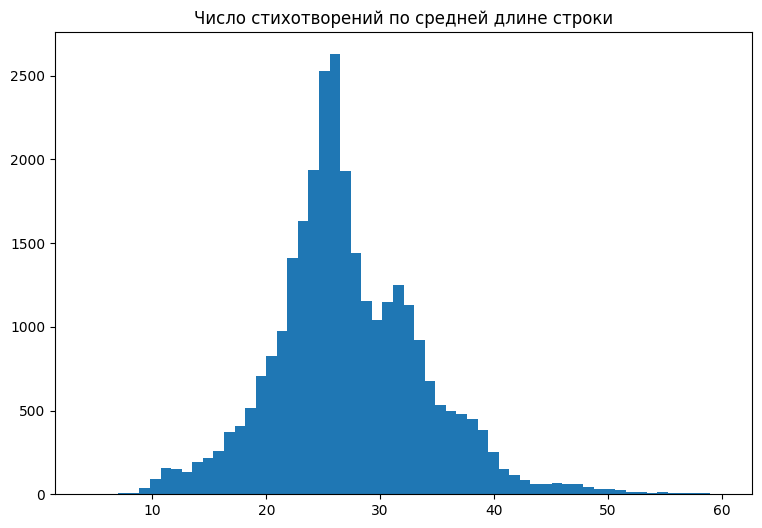

In [372]:
plt.figure(figsize=(9, 6))
plt.title('Число стихотворений по средней длине строки')
plt.hist(df_poems['mean_length'], bins=60)
plt.show()

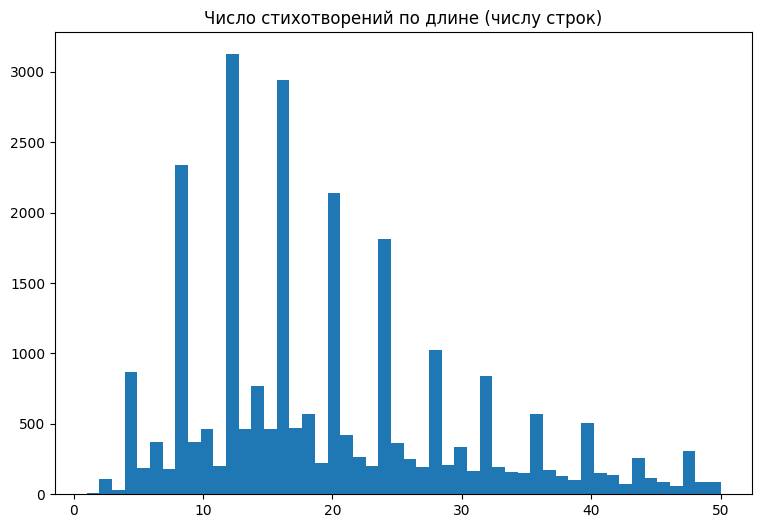

In [373]:
plt.figure(figsize=(9, 6))
plt.title('Число стихотворений по длине (числу строк)')
plt.hist(df_poems[df_poems['lines'] <= 50]['lines'], bins=50)
plt.show()

Урежем число строк до $40$.

In [374]:
df_poems_leq40 = df_poems[df_poems['lines'] <= 40]
stat_exp = df_poems_leq40['lines'].mean()
stat_disp = ((df_poems_leq40['lines'] - stat_exp)**2).mean()
stat_exp, stat_disp

(18.22842243573951, 81.65641315553835)

In [375]:
gamma_scale = stat_disp / stat_exp
gamma_shape = stat_exp / gamma_scale
gamma_lines_distr = gamma(gamma_shape, scale=gamma_scale)
gamma_values = gamma_lines_distr.pdf(np.arange(41))

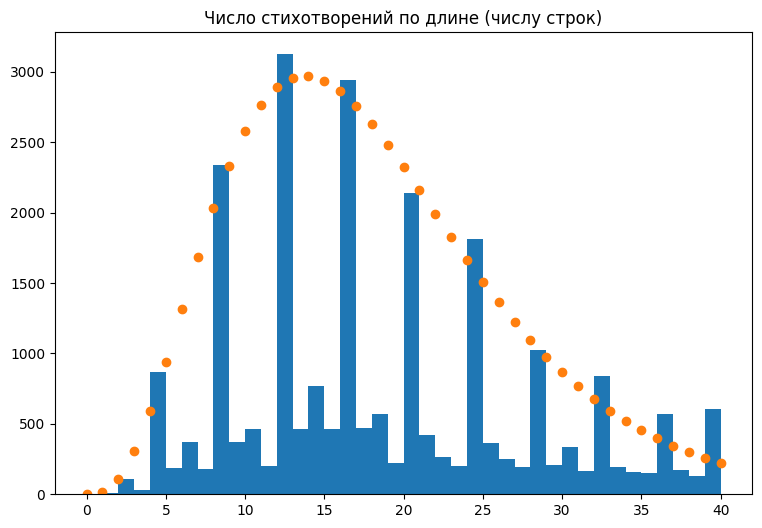

In [376]:
plt.figure(figsize=(9, 6))
plt.title('Число стихотворений по длине (числу строк)')
plt.hist(df_poems_leq40['lines'], bins=39)
plt.scatter(np.arange(41), 60000 * gamma_values, color='C1')
plt.show()

In [377]:
def random_size(distr, size_min, size_max):
    while True:
        result = round(distr.rvs())
        if size_min <= result <= size_max:
            return result

def get_text_pieces(distr, size_min, size_max, text):
    lines = text.split('\n')
    pieces = []
    index_start = 0
    while True:
        size = len(lines) - index_start
        if size > size_max:
            size = random_size(distr, size_min, size_max)
        if size >= size_min:
            pieces.append('\n'.join(lines[index_start:index_start + size]))
            index_start += size
        else:
            break
    return pieces

In [378]:
np.random.seed(101)
rearranged = []
for index, poem in tqdm.tqdm(df_poems.iterrows(), total=df_poems.shape[0]):
    pieces = get_text_pieces(gamma_lines_distr, 8, 40, poem['text'])
    if not pieces:
        continue
    poem['text'] = ''
    df_pieces = pd.concat([poem] * len(pieces), axis=1, ignore_index=True).T
    df_pieces['text'] = pieces
    df_pieces.insert(2, 'part', np.arange(len(pieces)))
    rearranged.append(df_pieces)

100%|███████████████████████████████████| 29340/29340 [00:27<00:00, 1062.42it/s]


In [379]:
df_poems = pd.concat(rearranged, ignore_index=True)
df_poems['lines'] = df_poems['text'].map(
    lambda text: len(re.findall('\n', text)) + 1
)
df_poems['mean_length'] = df_poems['text'].map(
    lambda text: np.array(list(map(len, text.split('\n')))).mean()
)

In [380]:
df_poems = df_poems[df_poems['mean_length'] <= 60]
df_poems.reset_index(drop=True, inplace=True)
df_poems

,author,title,part,text,lines,mean_length
0,Агнивцев,брат антонио,0,"В монастырской тихой келье,\nПозабывши о весел...",30,22.733333
1,Агнивцев,грузовик 1317,0,"Весь машинный свой век, каждый день по утрам\n...",23,29.695652
2,Агнивцев,грузовик 1317,1,"Грузовик № 1317.\nНо открылись фронты! О, услы...",36,28.583333
3,Агнивцев,мэри пикфорд,0,"В Америке где-то\nСудя по газетам,\nЕсть город...",36,20.388889
4,Агнивцев,бильбокэ,0,"К дофину Франции, в печали,\nСкользнув тайком,...",36,26.500000
...,...,...,...,...,...,...
54244,Яшин,зеркальце,2,"В руки зеркальце взяла\nИ сказала:\n«Удружи,\n...",38,22.157895
54245,Яшин,очень много солнечного света,0,"Очень много солнечного света,\nНад землей стои...",26,25.269231
54246,Яшин,огонек,0,"Светлячок во мгле —\nОгонек в лесах.\nМожет, о...",19,14.578947
54247,Яшин,назови меня именем светлым,0,"Назови меня именем светлым,\nЧистым именем наз...",17,24.117647


## Посмотрим статистику по авторам

In [381]:
authors_rare = df_poems.groupby('author').size().sort_values().head(10)
authors_rare

author
Дуров             1
Крапивин          2
Ржевский          2
Гребенка          2
Лившиц            5
Крученых         10
Гончаров         11
Чичибабин        12
Багрицкий-сын    13
Отрада           14
dtype: int64

In [382]:
df_poems = df_poems.loc[~df_poems['author'].isin(
    authors_rare[authors_rare <= 5].index
)]
df_poems.reset_index(inplace=True, drop=True)
df_poems

,author,title,part,text,lines,mean_length
0,Агнивцев,брат антонио,0,"В монастырской тихой келье,\nПозабывши о весел...",30,22.733333
1,Агнивцев,грузовик 1317,0,"Весь машинный свой век, каждый день по утрам\n...",23,29.695652
2,Агнивцев,грузовик 1317,1,"Грузовик № 1317.\nНо открылись фронты! О, услы...",36,28.583333
3,Агнивцев,мэри пикфорд,0,"В Америке где-то\nСудя по газетам,\nЕсть город...",36,20.388889
4,Агнивцев,бильбокэ,0,"К дофину Франции, в печали,\nСкользнув тайком,...",36,26.500000
...,...,...,...,...,...,...
54232,Яшин,зеркальце,2,"В руки зеркальце взяла\nИ сказала:\n«Удружи,\n...",38,22.157895
54233,Яшин,очень много солнечного света,0,"Очень много солнечного света,\nНад землей стои...",26,25.269231
54234,Яшин,огонек,0,"Светлячок во мгле —\nОгонек в лесах.\nМожет, о...",19,14.578947
54235,Яшин,назови меня именем светлым,0,"Назови меня именем светлым,\nЧистым именем наз...",17,24.117647


In [383]:
df_poems.groupby('author').size().sort_values(ascending=False).head(10)

author
Маяковский    4665
Анненский     2686
Северянин     2194
Некрасов      2163
Брюсов        1872
Блок          1739
Толстой       1691
Пушкин        1444
Лермонтов     1424
Бальмонт      1324
dtype: int64

## Датасет начищен до блеска! Сохраняем

In [384]:
df_poems = df_poems.drop(['lines', 'mean_length'], axis=1, errors='ignore')
df_poems.to_csv('../data/poems_prepared.csv', index=False)